<a href="https://colab.research.google.com/github/wendyfqm19/Aprendizaje-Autom-tico/blob/main/Tarea_4_ML_MelissaBonilla_OscarAlfaro_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instituto Tecnológico de Costa Rica.**
## Programa de Ciencia de datos.
## Módulo 2: Aprendizaje automático.

## Tarea 4.

**Profesor:** Felipe Meza.

# **Elaborado por:**

Melissa Bonilla.

Óscar Alfaro Badilla.

# **Auto Encoders**



In [ ]:
# Importación de librerías.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import keras
from keras import layers
from keras.callbacks import TensorBoard
from keras.datasets import mnist
%matplotlib inline 

**Importación de librerías**

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

**Carga de datos en datos de entrenamiento y pruebas**

MNIST: es un conjunto de datos de visión artificial simple. Consiste en imágenes de dígitos escritos a mano en forma de escala de grises. También incluye etiquetas para cada imagen, con el dígito. Cada imagen en el conjunto de datos MNIST tiene 28 píxeles por 28 píxeles.
Por default asigna 60000 registros para training y 10000 para testing

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Tamaño de las matrices

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

**Visualización de datos de entrenamiento**

Imagenes Originales


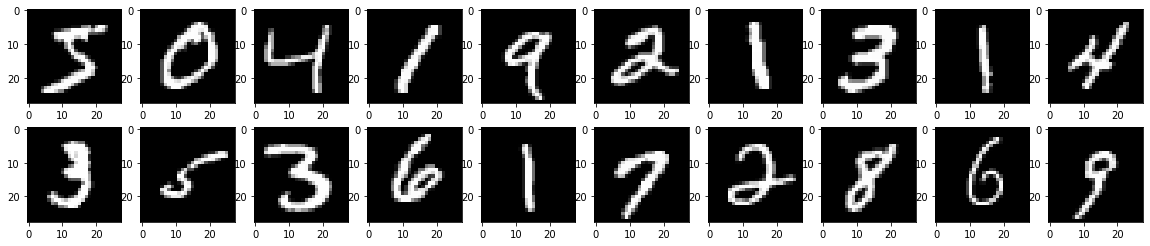

In [ ]:
plt.figure(figsize=(20, 4))
print("Imagenes Originales")
for i in range(0,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i,:,:], cmap='gray')  
plt.show()

**Formato datos**

Se convierte la matriz original de (28 pixeles x 28 pixeles) de imágenes 2-D en un vector de 28 × 28 = 784 números. 

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

Tamaño de las matrices

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

**Se añade ruido a las imágenes**

Se define un factor de ruido que es un hiperparámetro. El factor de ruido se multiplica por una matriz aleatoria que tiene una media de 0,0 y una desviación estándar de 1,0. Al agregar el ruido, la forma de la matriz normal aleatoria será similar a la forma de los datos a los que agregará el ruido.
  Para garantizar que los valores de los elementos de la matriz de imágenes finales estén dentro del rango de 0 a 1, se usa el método np.clip. El  clip  es una función Numpy que recorta los valores fuera del rango Min-Max y los reemplaza con el valor mínimo o máximo designado.

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

**Red Encoder**

Tendrá una capa de entrada de 784 neuronas 

In [ ]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
#model.add(Dense(300, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(300, activation='relu'))
#model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 9s 29ms/step - loss: 0.0328 - val_loss: 0.0142
Epoch 2/2
300/300 [==============================] - 7s 24ms/step - loss: 0.0113 - val_loss: 0.0088


In [ ]:
pred = model.predict(x_test_noisy)

Imágenes de prueba iniciales


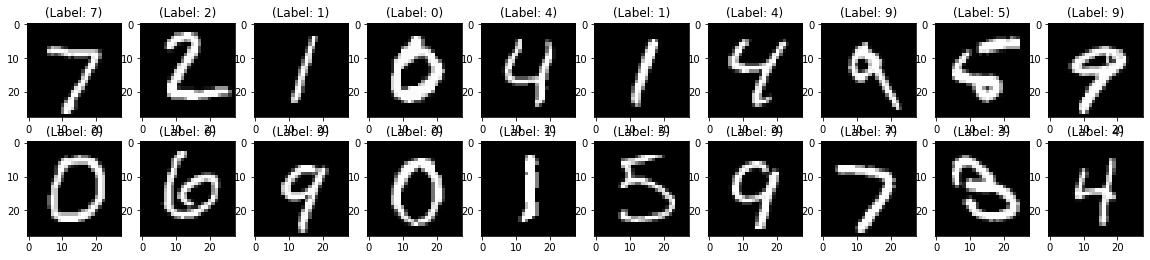

Imágenes de prueba con ruido


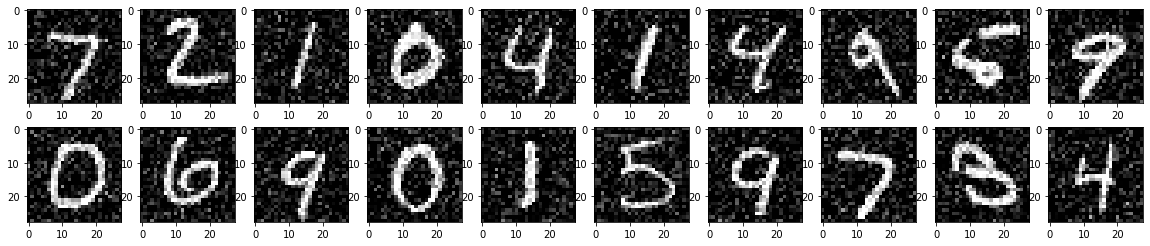

Reconstrucción de imágenes con ruido


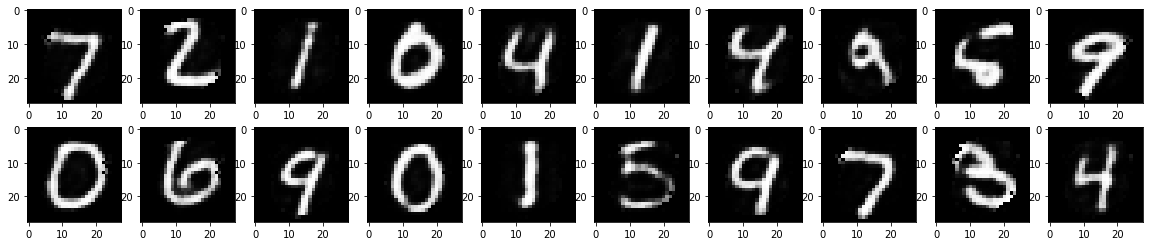

In [ ]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Imágenes de prueba iniciales")
for i in range(0,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Imágenes de prueba con ruido")
for i in range(0,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstrucción de imágenes con ruido")
for i in range(0,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

